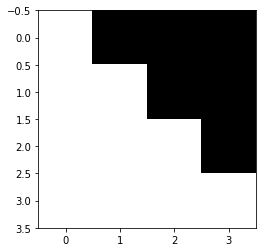

In [2]:
import matplotlib.pyplot as plt 
from google.colab import drive
import numpy as np
import random
import sys

sys.setrecursionlimit(10000)

#Code for visualization
a=np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])
b=[]
for i in range(4):
  b.append([])
  for j in range(4):
    b[i].append([])
    if a[i][j]==1:
      b[i][j]=[255,255,255]
    else:
      b[i][j]=[0,0,0]
plt.imshow(b)



In [3]:
import copy
import random

dir=[[-1,0],[0,1],[1,0],[0,-1]]

def connect_check(p1,p2,n,visited,white_conn=False):
  if(p1==p2):
    return True
  if(visited[p1[0]][p1[1]]):
    return False
  
  visited[p1[0]][p1[1]]=True
  flag=False
  for i in range(4):
    a_n=p1[0]+dir[i][0]
    b_n=p1[1]+dir[i][1]
    if(0<=a_n and a_n<n and 0<=b_n and b_n<n):
      if connect_check([a_n,b_n],p2,n,visited):
        flag=True

  return flag


def DFS(dir_idx,a,b,n,end_x,p,table,visited,bored):
  # bored는 list안에 넣어서 call by reference
  if not visited[a][b]:
    visited[a][b]=True
    t_cnt=0
    for i in range(4):
      a_n=a+dir[i][0]
      b_n=b+dir[i][1]
      if(0<=a_n and a_n<n and 0<=b_n and b_n<n):
        if table[a_n][b_n]:
          t_cnt+=1
    
    flag=True
    a_f=a+dir[dir_idx][0]
    b_f=b+dir[dir_idx][1]
    if(0<=a_f and a_f<n and 0<=b_f and b_f<n):
      a_n=a+dir[(dir_idx+1)%4][0]
      b_n=b+dir[(dir_idx+1)%4][1]
      if(0<=a_n and a_n<n and 0<=b_n and b_n<n):
        table_cp=copy.deepcopy(table)
        table_cp[a][b]=True
        if not connect_check([a_f,b_f],[a_n,b_n],n,table_cp):
          flag=False
      a_n=a+dir[(dir_idx+3)%4][0]
      b_n=b+dir[(dir_idx+3)%4][1]
      if(0<=a_n and a_n<n and 0<=b_n and b_n<n):
        table_cp=copy.deepcopy(table)
        table_cp[a][b]=True
        if not connect_check([a_f,b_f],[a_n,b_n],n,table_cp):
          flag=False

    if(t_cnt<=1 and flag):
      table[a][b]=True
      dir_idxs=[0,0,0]
      if (random.random()<p):
        dir_idxs[0]=dir_idx
        if (random.random()<0.5):
          dir_idxs[1]=(dir_idx+1)%4
          dir_idxs[2]=(dir_idx+3)%4
        else:
          dir_idxs[1]=(dir_idx+3)%4
          dir_idxs[2]=(dir_idx+1)%4
      else:
        dir_idxs[2]=dir_idx
        if (random.random()<0.5):
          dir_idxs[0]=(dir_idx+1)%4
          dir_idxs[1]=(dir_idx+3)%4
        else:
          dir_idxs[0]=(dir_idx+3)%4
          dir_idxs[1]=(dir_idx+1)%4

      for idx in dir_idxs:
        a_n=a+dir[idx][0]
        b_n=b+dir[idx][1]
        if(0<=a_n and a_n<n and 0<=b_n and b_n<n):
          DFS(idx,a_n,b_n,n,end_x,p,table,visited,bored)
    
    elif((not bored[0]) and ((a==n-1 and b==end_x-1)or(a==n-1 and b==end_x+1)or (a==n-2 and b==end_x))):
      table[a][b]=True
      bored[0]=True
    
    elif(a==n-2 and (b==end_x-1 or b==end_x+1) and (not bored[0])):
      table[a][b]=True
      if (random.random()<0.5):
        DFS(2,n-1,b,n,end_x,p,table,visited,bored)
      else:
        DFS(1,n-2,end_x,n,end_x,p,table,visited,bored)


def build_maze(n,p,start_x,end_x,table):
  table.clear() #size도 사라지고, id값 바뀌지 않음.
  visited=[]
  bored=[False]

  for i in range(n):
    table.append([])
    visited.append([])
    for j in range(n):
      table[i].append(False)
      visited[i].append(False)
  table[n-1][end_x]=True
  visited[n-1][end_x]=True
  DFS(2,0,start_x,n,end_x,p,table,visited,bored)
  return bored[0]


In [4]:
def DFS_path(dir_idx, pos, n, end_x, table, path, visited, cnt):
  # cnt는 list객체
  a=pos[0]
  b=pos[1]
  if a==n-1 and b==end_x:
    path[a][b]=True
    return True
  if not visited[a][b]:
    visited[a][b]=True
    path[a][b]=True
    for i in range(4):
      a_n=a+dir[i][0]
      b_n=b+dir[i][1]
      if (0<=a_n and a_n<n and 0<=b_n and b_n<n):
        flag=False
        if table[a_n][b_n]:
          flag=DFS_path(i, [a_n,b_n], n, end_x, table, path, visited, cnt)
          if flag:
            if dir_idx!=i:
              cnt[0]+=1
            return True
    # 4가지 방향 모두 끝에 도달하지 못했을 경우
    path[a][b]=False
  return False


def build_path(n, start_x, end_x, table, path):
  cnt=[0]
  path.clear()
  visited=[]
  for i in range(n):
    path.append([])
    visited.append([])
    for j in range(n):
      path[i].append(False)
      visited[i].append(False)
  DFS_path(2,[0,start_x],n,end_x,table,path,visited,cnt)
  return cnt[0]

In [5]:
def print_maze(table, start_x, end_x):
  n=len(table)
  W="  "
  B="##"
  print(B*(start_x+1),end='')
  print(W,end='')
  print(B*(n-start_x))

  for i in range(n):
    print(B,end='')
    for j in range(n):
      if table[i][j]:
        print(W,end='')
      else:
        print(B,end='')
    print(B)
  
  print(B*(end_x+1),end='')
  print(W,end='')
  print(B*(n-end_x))
  print()


def print_path(table, path, start_x, end_x):
  n=len(table)
  W="  "
  B="##"
  P="''"
  print(B*(start_x+1),end='')
  print(P,end='')
  print(B*(n-start_x))

  for i in range(n):
    print(B,end='')
    for j in range(n):
      if table[i][j]:
        if path[i][j]:
          print(P,end='')
        else:
          print(W,end='')
      else:
        print(B,end='')
    print(B)

  print(B*(end_x+1),end='')
  print(P,end='')
  print(B*(n-end_x))
  print()


def show_maze(table, start_x, end_x):
  n=len(table)
  W=[255,255,255]
  B=[0,0,0]
  im=[]
  im.append([])
  [im[0].append(B) for i in range(start_x+1)]
  im[0].append(W)
  [im[0].append(B) for i in range(n-start_x)]
  for i in range(n):
    im.append([B])
    for j in range(n):
      if table[i][j]:
          im[i+1].append(W)
      else:
        im[i+1].append(B)
    im[i+1].append(B)
  im.append([])
  [im[n+1].append(B) for i in range(end_x+1)]
  im[n+1].append(W)
  [im[n+1].append(B) for i in range(n-end_x)]

  return im


def show_path(table, path, start_x, end_x):
  n=len(table)
  W=[255,255,255]
  B=[0,0,0]
  P=[255,0,0]
  im=[]
  im.append([])
  [im[0].append(B) for i in range(start_x+1)]
  im[0].append(P)
  [im[0].append(B) for i in range(n-start_x)]
  for i in range(n):
    im.append([B])
    for j in range(n):
      if table[i][j]:
        if path[i][j]:
          im[i+1].append(P)
        else:
          im[i+1].append(W)
      else:
        im[i+1].append(B)
    im[i+1].append(B)
  im.append([])
  [im[n+1].append(B) for i in range(end_x+1)]
  im[n+1].append(P)
  [im[n+1].append(B) for i in range(n-end_x)]

  return im


def build_edge(im_m,im_p,table,path,start_x,end_x):
  n=len(table)
  im_m.append([])
  im_p.append([])
  [im_m[0].append(False) for i in range(start_x+1)]
  [im_p[0].append(False) for i in range(start_x+1)]
  im_m[0].append(True)
  im_p[0].append(True)
  [im_m[0].append(False) for i in range(n-start_x)]
  [im_p[0].append(False) for i in range(n-start_x)]
  for i in range(n):
    im_m.append([False])
    im_p.append([False])
    for j in range(n):
      if table[i][j]:
        im_m[i+1].append(True)
        if path[i][j]:
          im_p[i+1].append(True)
        else:
          im_p[i+1].append(False)
      else:
        im_m[i+1].append(False)
        im_p[i+1].append(False)
    im_m[i+1].append(False)
    im_p[i+1].append(False)
  im_m.append([])
  im_p.append([])
  [im_m[n+1].append(False) for i in range(end_x+1)]
  [im_p[n+1].append(False) for i in range(end_x+1)]
  im_m[n+1].append(True)
  im_p[n+1].append(True)
  [im_m[n+1].append(False) for i in range(n-end_x)]
  [im_p[n+1].append(False) for i in range(n-end_x)]

  return im_m, im_p


In [6]:
# main
table=[]
path=[]

n=8
'''
for i in range(10):
  p=0.3+(0.7/10)*i
  fig=plt.figure(figsize=(16,4))
  fig.suptitle('P='+str(p), fontsize=16)
  for t in range(8):
    start_x=random.randrange(0,n)
    end_x=random.randrange(0,n)
    build_maze(n,p,start_x,end_x,table)
    cnt=build_path(n,start_x,end_x,table,path)
   
    im_m=show_maze(table,start_x,end_x)
    im_p=show_path(table,path,start_x,end_x)
    plt.subplot(2,8,t+1)
    plt.imshow(np.array(im_m))
    plt.title('cnt='+str(cnt))
    plt.subplot(2,8,t+1+8)
    plt.imshow(np.array(im_p))
'''

"\nfor i in range(10):\n  p=0.3+(0.7/10)*i\n  fig=plt.figure(figsize=(16,4))\n  fig.suptitle('P='+str(p), fontsize=16)\n  for t in range(8):\n    start_x=random.randrange(0,n)\n    end_x=random.randrange(0,n)\n    build_maze(n,p,start_x,end_x,table)\n    cnt=build_path(n,start_x,end_x,table,path)\n   \n    im_m=show_maze(table,start_x,end_x)\n    im_p=show_path(table,path,start_x,end_x)\n    plt.subplot(2,8,t+1)\n    plt.imshow(np.array(im_m))\n    plt.title('cnt='+str(cnt))\n    plt.subplot(2,8,t+1+8)\n    plt.imshow(np.array(im_p))\n"

In [7]:
# Dataset 만드는 코드
import pickle
from google.colab import drive
import time
drive.mount('/content/gdrive')

PATH="/content/gdrive/MyDrive/DataSet/"

# 이름 형식은 M _ (n) _ (Number of data/1000) + (필요하다면 cnt) + (필요하다면 p)
# (train/test) 이건 미리 구분해 둘 필요가 없어 보여서 뺐습니다.
# [[map1(2-dimension),path1(2-dimension)],[map2,path2],...] 이런 순서로 저장됨.
num=1000

name="M_16_"+str(num//1000)
n=16
bucket=[]
cnt_list=[]
t1=time.time()
for i in range(num):
  p=random.randrange(70,92)/100
  start_x=random.randrange(0,n)
  end_x=random.randrange(0,n)
  build_maze(n,p,start_x,end_x,table)
  cnt=build_path(n,start_x,end_x,table,path)
  cnt_list.append(cnt)
  im_m=[]
  im_p=[]
  build_edge(im_m,im_p,table,path,start_x,end_x)
  bucket.append([[],[]])
  bucket[i][0]=copy.deepcopy(im_m)
  bucket[i][1]=copy.deepcopy(im_p)
  if i%1000==999:
    print(i+1,"/",num,"finished :",time.time()-t1)

with open(PATH+name+'.pickle', 'wb') as f:
    pickle.dump(np.array(bucket), f, pickle.HIGHEST_PROTOCOL)
print("finished. time :",time.time()-t1)

# M_8_200 finished. time : 1781.6787614822388
# M_16_60 finished. time : 7721.626291036606 (p=0.7~0.95)
# M_16_30 finished. time : 4266.527472019196
# M_16_10 finished. time : 1662.545743227005



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1000 / 1000 finished : 133.22877168655396
finished. time : 133.295969247818


In [8]:
# 코딩을 해보니 numpy array로 저장하는 의미가 거의 없고, cnt까지 같이 묶어서 저장해야 하지 않나 싶다.
# 일단 오늘 저녁에 할 일은 cnt를 세어주는 함수를 완성하고,
# cnt수에 따른 accuracy가 유의미한 수준인지 확인해 보는 것이다.
# accuracy를 구할 때는 0.5를 threshold값으로 block들을 구분한 다음, 모두 path와 같은지 확인하는 방법.
dir=[[-1,0],[0,1],[1,0],[0,-1]]

def DFS_atr(table,path,visited,N,pos,dir_idx,end_x,turn_cnt,branch_cnt,length):
  if visited[pos[0]][pos[1]]:
    return False
  visited[pos[0]][pos[1]]=True
  length[0]+=1
  if pos!=[N-1,end_x]:
    for i in range(4):
      a_n=pos[0]+dir[i][0]
      b_n=pos[1]+dir[i][1]
      if (0<=a_n<N and 0<=b_n<N):
        if (path[a_n][b_n] and i!=((dir_idx+2)%4)):
          dir_temp=i
          a_f=a_n
          b_f=b_n
        if (not path[a_n][b_n]) and table[a_n][b_n]:
          branch_cnt[0]+=1
    if dir_temp!=dir_idx:
      turn_cnt[0]+=1
    DFS_atr(table,path,visited,N,[a_f,b_f],dir_temp,end_x,turn_cnt,branch_cnt,length)

def get_attribute(table,path):
  # turn_cnt, branch_cnt, length를 구해보자.
  N=len(table)
  for i in range(N):
    if path[0][i]:
      start_x=i
    if path[N-1][i]:
      end_x=i
  turn_cnt=[0]
  branch_cnt=[0]
  length=[0]
  visited=[[False for i in range(N)] for j in range(N)]
  DFS_atr(table,path,visited,N,[0,start_x],2,end_x,turn_cnt,branch_cnt,length)
  return turn_cnt[0], branch_cnt[0], length[0]

18 7 80


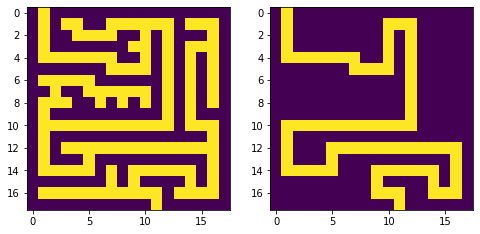

In [15]:
m=353
t,b,l=get_attribute(bucket[m][0],bucket[m][1])
print(t,b,l)
fig=plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(bucket[m][0])
plt.subplot(1,2,2)
plt.imshow(bucket[m][1])

In [10]:
'''
print(bucket)
fig=plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(bucket[100][0])
plt.subplot(1,2,2)
plt.imshow(bucket[100][1])
'''

'\nprint(bucket)\nfig=plt.figure(figsize=(8,4))\nplt.subplot(1,2,1)\nplt.imshow(bucket[100][0])\nplt.subplot(1,2,2)\nplt.imshow(bucket[100][1])\n'

In [11]:
'''
# open time measure

t_2=time.time()
with open(PATH+name+'.pickle', 'rb') as f:
  data_temp = pickle.load(f)
print(time.time()-t_2)
print(len(data_temp))
print(len(data_temp[0]))

fig=plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(data_temp[100][0])
plt.subplot(1,2,2)
plt.imshow(data_temp[100][1])
'''

"\n# open time measure\n\nt_2=time.time()\nwith open(PATH+name+'.pickle', 'rb') as f:\n  data_temp = pickle.load(f)\nprint(time.time()-t_2)\nprint(len(data_temp))\nprint(len(data_temp[0]))\n\nfig=plt.figure(figsize=(8,4))\nplt.subplot(1,2,1)\nplt.imshow(data_temp[100][0])\nplt.subplot(1,2,2)\nplt.imshow(data_temp[100][1])\n"

In [12]:
'''
name="M_train_8_60"
bucket=[]
t1=time.time()
for i in range(60000):
  p=random.randrange(50,92)/100
  start_x=random.randrange(0,n)
  end_x=random.randrange(0,n)
  build_maze(n,p,start_x,end_x,table)
  cnt=build_path(n,start_x,end_x,table,path)
  im_m=[]
  im_p=[]
  build_edge(im_m,im_p,table,path,start_x,end_x)
  bucket.append([[],[]])
  bucket[i][0]=copy.deepcopy(im_m)
  bucket[i][1]=copy.deepcopy(im_p)
with open(PATH+name+'.pickle', 'wb') as f:
    pickle.dump(np.array(bucket), f, pickle.HIGHEST_PROTOCOL)
print(name,"Dump finished. time :",time.time()-t1)

name="M_test_8_10"
bucket=[]
t1=time.time()
for i in range(10000):
  p=random.randrange(50,92)/100
  start_x=random.randrange(0,n)
  end_x=random.randrange(0,n)
  build_maze(n,p,start_x,end_x,table)
  cnt=build_path(n,start_x,end_x,table,path)
  im_m=[]
  im_p=[]
  build_edge(im_m,im_p,table,path,start_x,end_x)
  bucket.append([[],[]])
  bucket[i][0]=copy.deepcopy(im_m)
  bucket[i][1]=copy.deepcopy(im_p)
with open(PATH+name+'.pickle', 'wb') as f:
    pickle.dump(np.array(bucket), f, pickle.HIGHEST_PROTOCOL)
print(name,"Dump finished. time :",time.time()-t1)
'''
# M_train_8_60 Dump finished. time : 546.9213354587555
# M_test_8_10 Dump finished. time : 89.5487105846405

# 예쁘게 뽑히기 위해서는 테두리까지 같이 넣어서 돌렸어야 됐음
# 그래야 시작점과 끝 점을 알 수가 있음
# 그리고 bucket에 담기는 값들이 똑같은데 이거 해결
# dataset MNIST에서는 어떻게 생겼는지 잘 공부해오기.
# How to prevent Google Colab from disconnecting?

'\nname="M_train_8_60"\nbucket=[]\nt1=time.time()\nfor i in range(60000):\n  p=random.randrange(50,92)/100\n  start_x=random.randrange(0,n)\n  end_x=random.randrange(0,n)\n  build_maze(n,p,start_x,end_x,table)\n  cnt=build_path(n,start_x,end_x,table,path)\n  im_m=[]\n  im_p=[]\n  build_edge(im_m,im_p,table,path,start_x,end_x)\n  bucket.append([[],[]])\n  bucket[i][0]=copy.deepcopy(im_m)\n  bucket[i][1]=copy.deepcopy(im_p)\nwith open(PATH+name+\'.pickle\', \'wb\') as f:\n    pickle.dump(np.array(bucket), f, pickle.HIGHEST_PROTOCOL)\nprint(name,"Dump finished. time :",time.time()-t1)\n\nname="M_test_8_10"\nbucket=[]\nt1=time.time()\nfor i in range(10000):\n  p=random.randrange(50,92)/100\n  start_x=random.randrange(0,n)\n  end_x=random.randrange(0,n)\n  build_maze(n,p,start_x,end_x,table)\n  cnt=build_path(n,start_x,end_x,table,path)\n  im_m=[]\n  im_p=[]\n  build_edge(im_m,im_p,table,path,start_x,end_x)\n  bucket.append([[],[]])\n  bucket[i][0]=copy.deepcopy(im_m)\n  bucket[i][1]=copy.d

In [13]:
'''
t1=time.time()
bucket=[]
for i in range(10):
  p=random.randrange(50,92)/100
  start_x=random.randrange(0,n)
  end_x=random.randrange(0,n)
  build_maze(n,p,start_x,end_x,table)
  cnt=build_path(n,start_x,end_x,table,path)
  print(cnt)
  bucket.append([table,path])

m=7
im_m=show_maze(bucket[m][0],start_x,end_x)
im_p=show_path(bucket[m][0],bucket[m][1],start_x,end_x)
plt.subplot(1,2,1)
plt.imshow(np.array(im_m))
plt.subplot(1,2,2)
plt.imshow(np.array(im_p))
'''

'\nt1=time.time()\nbucket=[]\nfor i in range(10):\n  p=random.randrange(50,92)/100\n  start_x=random.randrange(0,n)\n  end_x=random.randrange(0,n)\n  build_maze(n,p,start_x,end_x,table)\n  cnt=build_path(n,start_x,end_x,table,path)\n  print(cnt)\n  bucket.append([table,path])\n\nm=7\nim_m=show_maze(bucket[m][0],start_x,end_x)\nim_p=show_path(bucket[m][0],bucket[m][1],start_x,end_x)\nplt.subplot(1,2,1)\nplt.imshow(np.array(im_m))\nplt.subplot(1,2,2)\nplt.imshow(np.array(im_p))\n'

In [14]:
'''
m=111
# 일단 이게 왜 똑같이 나오는지 해결하기
# 걍 scale이 너무 커서 뻑나간거같은데
im_m=show_maze(bucket[m][0],start_x,end_x)
im_p=show_path(bucket[m][0],bucket[m][1],start_x,end_x)
plt.subplot(1,2,1)
plt.imshow(np.array(im_m))
plt.subplot(1,2,2)
plt.imshow(np.array(im_p))
'''

'\nm=111\n# 일단 이게 왜 똑같이 나오는지 해결하기\n# 걍 scale이 너무 커서 뻑나간거같은데\nim_m=show_maze(bucket[m][0],start_x,end_x)\nim_p=show_path(bucket[m][0],bucket[m][1],start_x,end_x)\nplt.subplot(1,2,1)\nplt.imshow(np.array(im_m))\nplt.subplot(1,2,2)\nplt.imshow(np.array(im_p))\n'